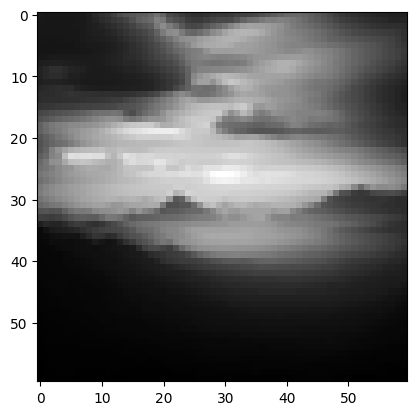

In [11]:
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt

# Path ke gambar input
image_path = '/content/low_res_60x60_image.png'  # Ganti dengan path gambar Anda
image = imageio.imread(image_path, mode='L')
image = (image).astype(np.uint8)  # Konversi ke 8-bit jika perlu

plt.imshow(image, cmap='gray')

plt.show()




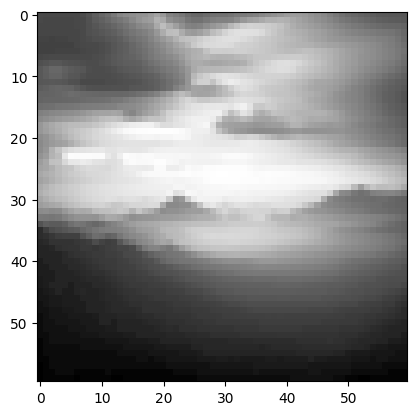

In [12]:
def histogram_equalization(image):
    # Menghitung histogram
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

    # Menghitung CDF (Cumulative Distribution Function)
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    # Mapping nilai piksel menggunakan CDF yang dinormalisasi
    equalized_image = cdf_normalized[image]
    return equalized_image

# Menerapkan histogram equalization
hist_eq_image = histogram_equalization(image)

plt.imshow(hist_eq_image, cmap='gray')

plt.show()



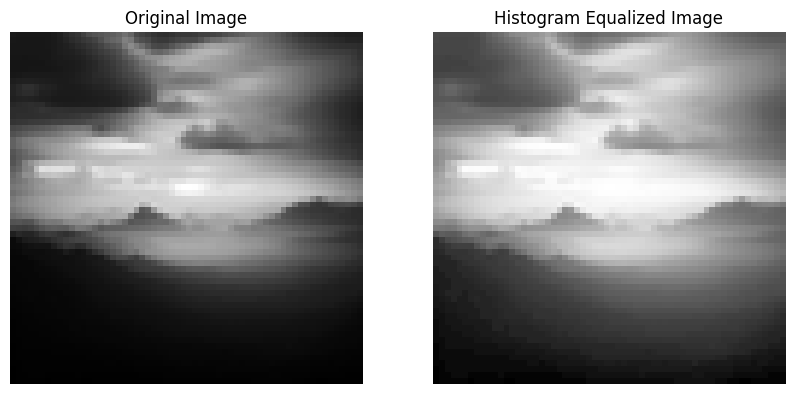

In [13]:
# Menampilkan gambar input dan output untuk perbandingan
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Gambar setelah histogram equalization
plt.subplot(1, 2, 2)
plt.title("Histogram Equalized Image")
plt.imshow(hist_eq_image, cmap='gray')
plt.axis('off')

plt.show()

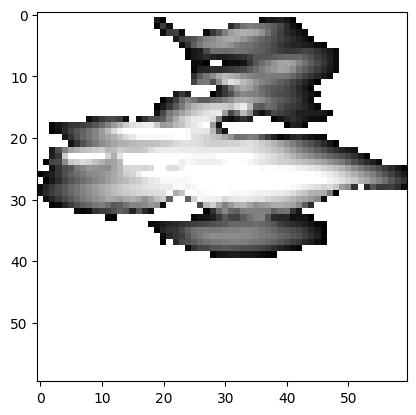

In [17]:
def adjust_contrast(image, level):
    """
    Meningkatkan kontras gambar menggunakan level tertentu.
    """
    # Menggeser nilai piksel dari tengah (128), lalu menyesuaikan kontras
    contrasted = (image - 128) * level + 128
    # Memastikan nilai piksel tetap dalam rentang 0–255
    contrasted = np.clip(contrasted, 0, 255).astype('uint8')
    return contrasted

# Menerapkan peningkatan kontras level 1.5
contrast_level = 1.5
contrast_image = adjust_contrast(image, contrast_level)

plt.imshow(contrast_image, cmap='gray')

plt.show()



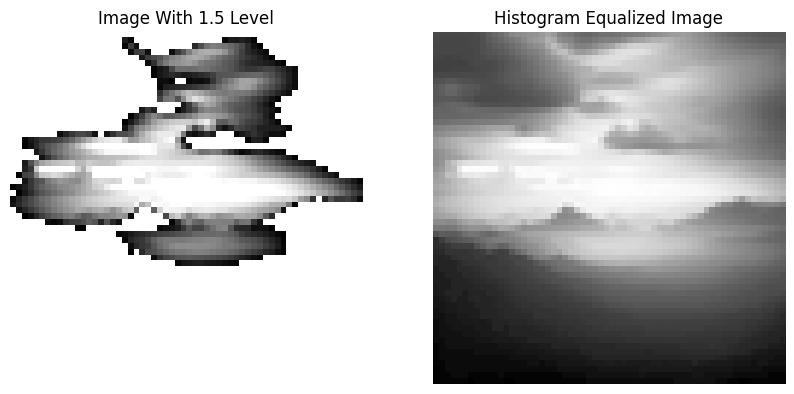

In [15]:
# Menampilkan gambar input dan output untuk perbandingan
plt.figure(figsize=(10, 5))

# Gambar dengan level kontras 1.5
plt.subplot(1, 2, 1)
plt.title("Image With 1.5 Level")
plt.imshow(contrast_image, cmap='gray')
plt.axis('off')

# Gambar setelah histogram equalization
plt.subplot(1, 2, 2)
plt.title("Histogram Equalized Image")
plt.imshow(hist_eq_image, cmap='gray')
plt.axis('off')

plt.show()